---
# Loterias 

Un pequeño analisis de loterias tradicionales venezolanas.
Consderaremos aspectos como:

- la cantidad de cartones (polibes conbinaciones), 
- la cantidad de tablas (conjunto de 6 cartones), 
- la distribucion de probabilidad de llenar de 1 a 3 cartones,
- hacer pruebas con distribuciones normales y no normale en la aparicion de las fichas.

De esta manera centamos la bases para un analisis funcional de la loterias.

el archivo estará divido en **X** secciones: 

- distribucion segun el numero de fichas
- lógica del código
- definicion de funciones
- representación de los resultados 
- analisis.

-----

# Librerias a usar

In [1]:
from itertools import combinations
from math import factorial
from os import scandir, getcwd

import re
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Distribucion

Usando la ecuacion de combinaciones sin repeticion,

$$C^{n}_{r} = \binom{n}{r} = \frac{n!}{r!(n-r)!}$$

donde n es el numero total de fichas y r en numero de fichas de cada carton. Para nuestro caso sabemos que cada carton contiene 8 fichas y deseamos saber cuantas combianciones tenemos si nuestro número total de fichas (`nFichas`) va de 15 a 80 fichas.

Pero antes hagamos un pequeño ejemplo, vamos a generar unas distribuciones sin repeticion con la herramientas `combinations` de la libreria `itertools`.

**Nota**: Debido a los recursos computaciones, vamos a representar muestras pequeñas

Primero, si contamos con una muestras de 4 elementos [a,b,c,d,e] y queremos saber cuantas combinaciones e 2 elementos tenemos  tenemos sin repetir ningun conjunto facilmente vemos que tenemos:

- [a,b]  ;  [a,c]  ;  [a,d]  ;  [a,e]

- [b,c]  ;  [b,d]  ;  [b,e]

- [c,d]  ;  [c,e]

- [d,e]

un total de 10 combinaciones, revisemos:


In [2]:
from itertools import combinations
from math import factorial

list(combinations(["a","b","c","d","e"],2))

[('a', 'b'),
 ('a', 'c'),
 ('a', 'd'),
 ('a', 'e'),
 ('b', 'c'),
 ('b', 'd'),
 ('b', 'e'),
 ('c', 'd'),
 ('c', 'e'),
 ('d', 'e')]

Si queremos el numero de combinaciones tenemos

In [2]:
def numComb (n,r):
    return factorial(n)/(factorial(r)*factorial(n-r))

numComb(5,2)


10.0

Veamos otro ejemplo un poco mas grande, combinemos  3 elementos de un cojunto de 7 (n =7, r = 3)

In [58]:
comb = combinations("1234567",3)
print(list(comb))

numComb(7,3)

[('1', '2', '3'), ('1', '2', '4'), ('1', '2', '5'), ('1', '2', '6'), ('1', '2', '7'), ('1', '3', '4'), ('1', '3', '5'), ('1', '3', '6'), ('1', '3', '7'), ('1', '4', '5'), ('1', '4', '6'), ('1', '4', '7'), ('1', '5', '6'), ('1', '5', '7'), ('1', '6', '7'), ('2', '3', '4'), ('2', '3', '5'), ('2', '3', '6'), ('2', '3', '7'), ('2', '4', '5'), ('2', '4', '6'), ('2', '4', '7'), ('2', '5', '6'), ('2', '5', '7'), ('2', '6', '7'), ('3', '4', '5'), ('3', '4', '6'), ('3', '4', '7'), ('3', '5', '6'), ('3', '5', '7'), ('3', '6', '7'), ('4', '5', '6'), ('4', '5', '7'), ('4', '6', '7'), ('5', '6', '7')]


35.0

Queremos visualizar como crece este numero de combinaciones para un cojunto fijo de 8 elementos pero cambiando el tamaño del conjunto total.

In [5]:
lfichas = np.arange(15,170,2)
r = 8  # numero de lementos de cada carton

nComb = [] # Numero de combinaciones para cada elemento de lfichas

for a in lfichas:
    c = numComb(a,r)
    nComb.append(c)


Hacemos el grafico

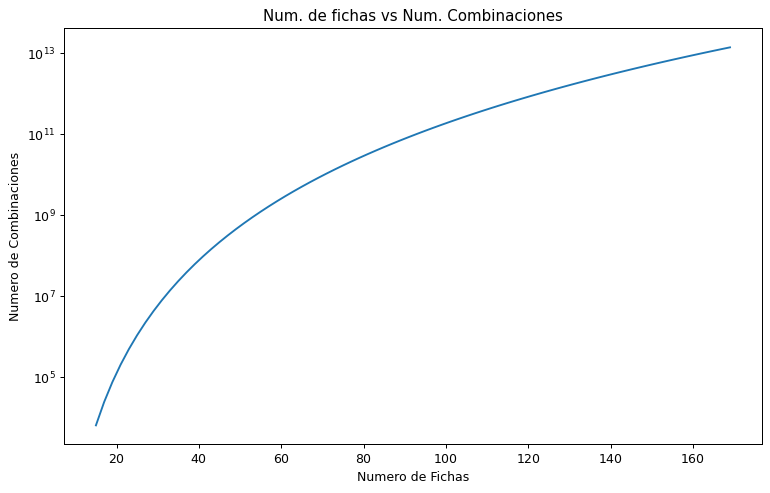

In [99]:
plt.figure(figsize=(10,6), dpi = 90)
plt.plot(lfichas,nComb)
plt.title("Num. de fichas vs Num. Combinaciones")
plt.xlabel("Numero de Fichas")
plt.ylabel("Numero de Combinaciones")
plt.yscale("log")

plt.show()

Aqui apresiamos el apena 19 fichas tenemos un numero suficiente para genera 75.582 cartones un total de 12.597 de tablas, hay que tener claro que la probabilidad de ganar la loteria depende del numero de cartones este jugando, en otras palabras, 1000 tablas presentes en el momento del sorteo, la probabilidad de ganar el sorteo de una tabla es 1/1000, lo que quiere decir que al aumentar el numero de cartones vamos a aumentar las probabilidad de ganar.
**no obstante esto se explora mas a fond en otra seccion**.

In [13]:
numComb(19,r)/6


12597.0

### Lógica del código 
 
 Vamos a definir un **generador de cartones**, un **antador de cartones** y una **ronda de juego** Con estas tres funciones podremos desarrollar una muestra de mil ronda de juego de manera que podamos ir anotando los resultado de cada ronda de juego.
 
 **nota**: antes de comenzar a describir cada funcion, solo s tomara una muestra para un numero pequeño de cartones.


### Generador de cartones

cada carton constará como un conjunto de dos arreglos, en el primero arreglo tendremos la matriz que representa el carton con combinaciones de fichas segun la cantidad de fichas (`nFichas`) y en le segundo tendremos la matriz de ceros y unos de manera que los $1^{os}$ representen las fichas anotadas segun valla saliento las fichas.

### Anotador de cartones

Segun valla apareciendo cada ficha la funcion ira revisando cada carton, si esta se encuentra en el carton, este cambiara la el valor del segundo arreglo del carton de 0 a 1.

### Ronda del juego

Esta funcion va a resibir el numero de cartones que quermos jugar y generara una distribución aleatoria normal de todas la fichas (Simulando cada ficha que sale en un sorteo) y con este arreglo revisamos nuestros cartones 




# Definiendo Funciones

Vamos necesitar la siguentes librerias

```python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
```

## Generador de cartones

Como la loteria se gana con carton lleno, da lo mismo si es un matriz o un arreglo linear. Posteriormente generaremos n tablas (1 tabla = 6 cartones)

```python
# Genera cartones de 8 fichas a partir de un conjunto de 
# nFichas y los retornas como un arreglo continuo.

def gen_cartones(nFichas):
    lista = np.arange(nFichas)
    lis = []
    orden = np.random.randint(0, 125969, 10)

    for i in orden:
      #print(list(itt.combinations(lista, 8))[i])
      lis.append(list(itt.combinations(lista, 8))[i])
```
Este seria la mejor forma pero consume muchos recursos. voy a modo de generar los 6 cartones voy a crearlos por grupos
 
    

In [2]:
#  de una lista del 1 al 168 escogo 
#  6 filas de 8 lementos sin repetir

def gen_cartones(nfichas, mismo):
    if mismo :
        rng = np.random.default_rng(1)
    else:
        rng = np.random.default_rng()
    cartones = rng.choice(range(1, nfichas), size=(6, 8), replace=False)
    check = np.zeros((6,8))
    return (cartones, check)

In [38]:
tabla, marcador = gen_cartones(168,False)
print(tabla)
print(marcador)

[[ 17 150  27   8 105  18 114 123]
 [ 11  22  78  50 104 144 111   5]
 [  7 112 154 115  15   4 138 139]
 [ 99 163  69 142  59  56  96  92]
 [ 31  71 109 102 103  58 165  67]
 [151 146  68 164  84  14  41  19]]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [40]:
tabla


array([[ 17, 150,  27,   8, 105,  18, 114, 123],
       [ 11,  22,  78,  50, 104, 144, 111,   5],
       [  7, 112, 154, 115,  15,   4, 138, 139],
       [ 99, 163,  69, 142,  59,  56,  96,  92],
       [ 31,  71, 109, 102, 103,  58, 165,  67],
       [151, 146,  68, 164,  84,  14,  41,  19]])

Aqui tenemos los intentos de hacer esta funciones
```python
np.random.seed(0)
rng = np.random.default_rng()

numbers = rng.choice(range(1, 168), size=(6, 8), replace=False)

randList = np.random.randint(0,48,size=(6,6))
numbers
```

## Anotador de cartones

En esta parte vamos a usar el anotador y la tabla con los 6 cartones para ir verificando cada numero que salga y estar atento a que unos de los cartones se llene

Primero vamos a establecer las condiciones para ganar el sorteo, en este caso llenar 1, 2 o 3 cartones.



In [3]:
def checker(mCards, nWin ):# ncards 1 a 6 cartones
    # En caso de tener varias tablas
    loterias = 0
    # Solo una tabla
   
    for card in mCards:
        
        valor, count = np.unique(card,return_counts=True)
                       
        if ((count[0] == 8) & (valor[0]==1 )): # Numero de fichas en el carton
            loterias = loterias + 1
            #print(loterias)
            
    if (loterias >= nWin):
        return 1
    
    return 0
        
    
# Buscar maneras de integrar y tomar en cuenta como optimizar
#    -Empezar a chekear luego de la 8va ficha anotada
#    -En el chekeador  podrias evitar revisar los catonoes con loteria
#    en caso de tener mas de un win.


def marker(mcards, ficha):
    x,y = np.where(mcards[0]==ficha)
    if (len(x) != 0):
        mcards[1][x,y] = 1
        return True
    else:
        return False
    

debug
```python
cards = gen_cartones(168)
cards [1][1,2]

a,b = np.where(cards[0]==134)
len(a) != 0

marker(cards,129)
cards
```

## Carton ganador
Vamos hacer una funcion parecida a al anterio pero con la intencion que retorne el carton ganador


In [4]:
def cardWin(mCards):# ncards 1 a 6 cartones
    # En caso de tener varias tablas
    cardwin = []
    counter = 0
    # Solo una tabla
   
    for card in mCards[1]:
        #print(card)
        valor, count = np.unique(card,return_counts=True)
                       
        if ((count[0] == 8) & (valor[0]==1 )): # Numero de fichas en el carton
            cardwin.append(mCards[0][counter])
           # print(card)
            
        counter += 1
        #print(counter)
    
    
    return cardwin

## Ronda del juego

Aqui vamos a definir  una lista de 168 numeros (fichas) aleatorias : aqui contaremos en numeros de fichas que necesitamos para ganar con nuestra tabla, para ello iremos revisando cada ficha en la tabla hasta tene un carton ganador (carton de la tabla lleno)


In [6]:
## jugar ronda para un carton
## incluir el numero de ficha y de cartones

def ronda_de_juego(wins,numFichas):
    nfichas = numFichas
    lFichas = random.sample(range(1,nfichas+1), nfichas)
    cuentaFichas = 0
    cuentaCheck = 0
    loteria = 0
    table = gen_cartones(nfichas,True) # True es el mismo carton
    
    for ficha in lFichas:
        cuentaFichas += 1
       
        
        if marker(table, ficha):
            cuentaCheck += 1
                    
        if (cuentaCheck >= 8):
            loteria = checker(table[1], wins )
    
        if (loteria == 1):
            #print (table)
            return (cuentaFichas,cardWin(table)) # Retorno el carton ganador


# Corridas

Ya tenemos nuestras maquinas simuladoras del juego de loteria, en resumen, hacer un ronda de loteria significa, generar una tabla con `gen_cartones(nfichas,True)` que contiene 6 cartones el cual va a ser el mismo para todas las corridas, empezamos a selecciona fichas del conjunto de fichas, revisamos si tenemos la ficha, la anotamos y por ultimo, cunado tengamos carton lleno, paramos la cuenta y anotamos los datos que estan a continuacio.  

In [141]:
# Iniciamos el data frame
df_loteria = pd.DataFrame(columns = ["numTablas", "numFichas", "distFichas"
                                     , "fichasToWin","tabToWin"])
df_loteria

,numTablas,numFichas,distFichas,fichasToWin,tabToWin


Numero de tablas con las que jugamos, el numero de fichas que componen la loteria, la distribucion en la que van saliendo la fichas, que de momento es uniforme pero en futuras ocaciones sera una distribucion no balanceada, luego anotamos las fichas necesarias para que u carton gane y por ultimo el carton ganador.

## Primera conf

 Iniciamos el Dataframe

In [ ]:
df_loteria = pd.DataFrame(columns = ["numTablas", "numFichas", "distFichas", "fichasToWin","tabToWin"])
NdeFichas = 140
nwin = 1
nTab = 1 # 6 cartones
dist = "uniform"
rondas = 100

for i in range(rondas):
    temp_ftw = ronda_de_juego(nwin,NdeFichas)[0] # numero de cartones llenos y Numero de fichas 
    temp_ttw = ronda_de_juego(nwin,NdeFichas)[1] #           "                       "
    data = pd.Series({"numTablas":1,"numFichas":NdeFichas
                      , "distFichas":dist, "fichasToWin":temp_ftw
                      ,"tabToWin":temp_ttw})
    
    
    df_loteria = pd.concat([df_loteria,data.to_frame().T],ignore_index=True)
    
df_loteria.to_csv(r'data/df_loteria.csv', header = True, index = False)  

por limitaciones computacionales, hacemos corridas de 100 en 100 hasta llegar a tener 1000 muestras

In [ ]:
df_loteria = pd.read_csv("data/df_loteria.csv")

for i in range(rondas):
    temp_ftw = ronda_de_juego(nwin,NdeFichas)[0] # numero de cartones llenos y Numero de fichas 
    temp_ttw = ronda_de_juego(nwin,NdeFichas)[1] #           "                       "
    data = pd.Series({"numTablas":1,"numFichas":NdeFichas
                      , "distFichas":dist, "fichasToWin":temp_ftw
                      ,"tabToWin":temp_ttw})
    
    df_loteria = pd.concat([df_loteria,data.to_frame().T],ignore_index=True)
    
df_loteria.to_csv(r'data/df_loteria.csv', header = True, index = False)

Por ultimo guardamos nuestros datos etiquedados, la parte nuerada significa `de_loteria_[tablas][CardsToWin][distribucion][número de fichas]` con el fin de tener los datos organizados, sin embargo, todos los datos adquiridos van a estar disponibles en un solo DF.

In [ ]:
df_loteria.to_csv(r'data/df_loteria_11u140.csv', header = True, index = False)

Primero simularemos 1000 partidas de loteria, con una tabla, donde se gana con 1, 2 y 3 cartones llenos, variando el número de fichas desde 50 hasta 170 variando de 10 en 10.

In [222]:
# 1 carton lleno de la tabla , 1 sola tabla , distribucion uniforme y 50 fichas
df_loteria = pd.read_csv("data/df_loteria_11u50.csv")
df_loteria

,numTablas,numFichas,distFichas,fichasToWin,tabToWin
0,1,50,uniform,41,"[array([ 5, 11, 20, 17, 49, 45, 8, 10])]"
1,1,50,uniform,43,"[array([26, 41, 28, 48, 23, 46, 7, 16])]"
2,1,50,uniform,38,"[array([13, 40, 25, 14, 34, 6, 47, 37])]"
3,1,50,uniform,36,"[array([ 5, 11, 20, 17, 49, 45, 8, 10])]"
4,1,50,uniform,33,"[array([13, 40, 25, 14, 34, 6, 47, 37])]"
...,...,...,...,...,...
994,1,50,uniform,42,"[array([ 2, 43, 3, 19, 42, 38, 1, 29])]"
995,1,50,uniform,41,"[array([ 5, 11, 20, 17, 49, 45, 8, 10])]"
996,1,50,uniform,39,"[array([ 2, 43, 3, 19, 42, 38, 1, 29])]"
997,1,50,uniform,43,"[array([39, 36, 32, 4, 27, 44, 35, 9])]"


# Representacion gráfica de los datos

Antes de hablar de los resultados, esta primera ronda de datos, nos va a serivir de referencia para fijar el tamaño del conjunto de fichas, en realidad no representa mucho en el contexto estadistico, porque la probabilidad de ganar el carton de loteria va a depender por completo del número de personas que juegan. 

Con los datos disponibles, vamos visualizar como influye en numero de fichas en forma como se llenan los cartones de una tabla, Como hicimos los calculos por parte vamos a unir toda la data disponible en un data frame.

In [2]:
# Solo una ves para concatenar todos los data frame

def ls(ruta = getcwd()):
    return [arch.name for arch in scandir(ruta) if arch.is_file()]

def dfConcat(entrada,fileout):
    list_file = ls(entrada)
    df_loteria = pd.DataFrame(columns = ["numTablas", "numFichas", "distFichas", "fichasToWin","tabToWin"])
    
    for file in list_file:
        temp_df_loteria = pd.read_csv(entrada+file)
        df_loteria = pd.concat([df_loteria,temp_df_loteria],ignore_index=True)
    
    df_loteria.to_csv(entrada+fileout, header = True, index = False)

# Para invocar la funcion anterior y cont
entrada = 'data/tab&fichas/listas/'
fileout = 'df_loteria_tap&fichas.csv'

dfConcat(entrada,fileout)

Empecemos a visualizar los datos

In [2]:
df_loteria = pd.read_csv("data/df_loteria_tap&fichas.csv")

In [3]:
df_loteria

,numTablas,numFichas,distFichas,fichasToWin,tabToWin
0,1,120,uniform,109,"[array([96, 30, 45, 14, 93, 58, 12, 86]), arra..."
1,1,120,uniform,101,"[array([ 72, 26, 8, 87, 119, 33, 65, 31..."
2,1,120,uniform,100,"[array([96, 30, 45, 14, 93, 58, 12, 86]), arra..."
3,1,120,uniform,103,"[array([96, 30, 45, 14, 93, 58, 12, 86]), arra..."
4,1,120,uniform,108,"[array([96, 30, 45, 14, 93, 58, 12, 86]), arra..."
...,...,...,...,...,...
38994,1,90,uniform,81,"[array([23, 63, 13, 33, 82, 71, 20, 69]), arra..."
38995,1,90,uniform,84,"[array([17, 30, 72, 34, 67, 84, 11, 47]), arra..."
38996,1,90,uniform,79,"[array([66, 81, 31, 88, 48, 86, 7, 56]), arra..."
38997,1,90,uniform,76,"[array([23, 63, 13, 33, 82, 71, 20, 69]), arra..."


Vemos que en la columna `tabToWin` tenemos los cartones en formato str, vamos a cambiarlo para convertirlo despues en una cariable categorica. 

Definimos una funcion que separa los numeros contenidos en el estring y luego los ordena un arreglo. Por ultimo anexamos los datos a una copia del DataFrame y anexamos una columna que contega el numero de cartones necesarios para ganar

In [5]:
def reorder_tabs(dataFrame):
    nDF = dataFrame.copy()
    df_out = []
    
    for tab in nDF:
        array = []

        int_b = re.findall("(\d+)",tab)

        for i in range(int(len(int_b)/8)):
            temp_array = []

            for i in range(i*8,i*8+8):
                temp_array.append(int(int_b[i]))

            array.append(temp_array)
        
        df_out.append(array)
        
    return df_out

# Invocamos la funcion
df = df_loteria["tabToWin"].copy()
tabs = reorder_tabs(df)
tab2win = []

for tab in tabs:
    tab2win.append(len(tab))

df_loteria1 = df_loteria.copy()
    
df_loteria1["tab2win"] = pd.Series(tab2win)
df_loteria1["tabs"]=pd.Series(tabs)
df_loteria1.pop("tabToWin")
df_loteria1    

,numTablas,numFichas,distFichas,fichasToWin,tab2win,tabs
0,1,120,uniform,109,2,"[[96, 30, 45, 14, 93, 58, 12, 86], [38, 85, 20..."
1,1,120,uniform,101,2,"[[72, 26, 8, 87, 119, 33, 65, 31], [36, 110, 5..."
2,1,120,uniform,100,2,"[[96, 30, 45, 14, 93, 58, 12, 86], [109, 41, 1..."
3,1,120,uniform,103,2,"[[96, 30, 45, 14, 93, 58, 12, 86], [72, 26, 8,..."
4,1,120,uniform,108,2,"[[96, 30, 45, 14, 93, 58, 12, 86], [38, 85, 20..."
...,...,...,...,...,...,...
38994,1,90,uniform,81,3,"[[23, 63, 13, 33, 82, 71, 20, 69], [9, 54, 38,..."
38995,1,90,uniform,84,3,"[[17, 30, 72, 34, 67, 84, 11, 47], [9, 54, 38,..."
38996,1,90,uniform,79,3,"[[66, 81, 31, 88, 48, 86, 7, 56], [23, 63, 13,..."
38997,1,90,uniform,76,3,"[[23, 63, 13, 33, 82, 71, 20, 69], [43, 16, 6,..."


Lo primero que vamos a apreciar es una vision general de las fichas necesarias para ganar con una sola tabla, recordemos que son 6 cartones de 8 fichas (48 fichas en total). Abajo vemos el numero de veces que se ganó con un cierto numero de fichas cantadas. las variaciones de color son para ganar con 1, 2 o 3 cartones.

Recordemos que tenemos al rededor de 39.000 sorteos donde, con una misma tabla variamos en numero de fichas y los catones necesarios para ganar, el cual esta represnetado por los colores de la leyenda.

<AxesSubplot: xlabel='fichasToWin', ylabel='Count'>

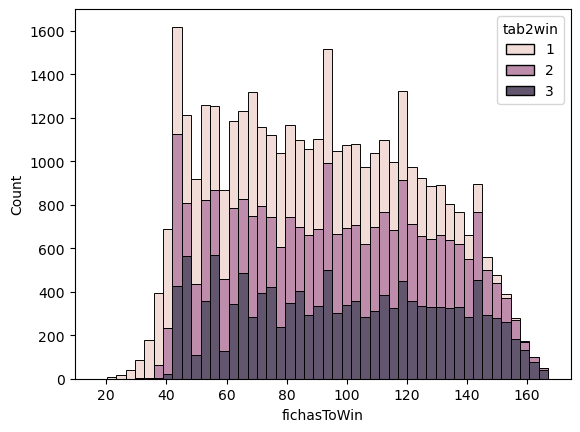

In [7]:


sns.histplot(data=df_loteria1, x="fichasToWin", hue="tab2win",multiple="stack")

Visto de otra forma, tenemos la distribcion total para las 3 diferentes formas de ganar, cambiando el matis en grafica con el numero de fichas totales del sorteo. 

Podemos notar que el numero de fichas necesarias para ganar, varia casí de forma lienal a medida que se aumenta el numero de fichas, esto se aprecia en el degradado constante a medida que aumento las fichas necesarias para ganar un carton.

In [49]:
data1= df_loteria1[["fichasToWin","numFichas"]].loc[df_loteria1["tab2win"]==1]
data2= df_loteria1[["fichasToWin","numFichas"]].loc[df_loteria1["tab2win"]==2]
data3= df_loteria1[["fichasToWin","numFichas"]].loc[df_loteria1["tab2win"]==3]

<AxesSubplot: xlabel='fichasToWin', ylabel='Count'>

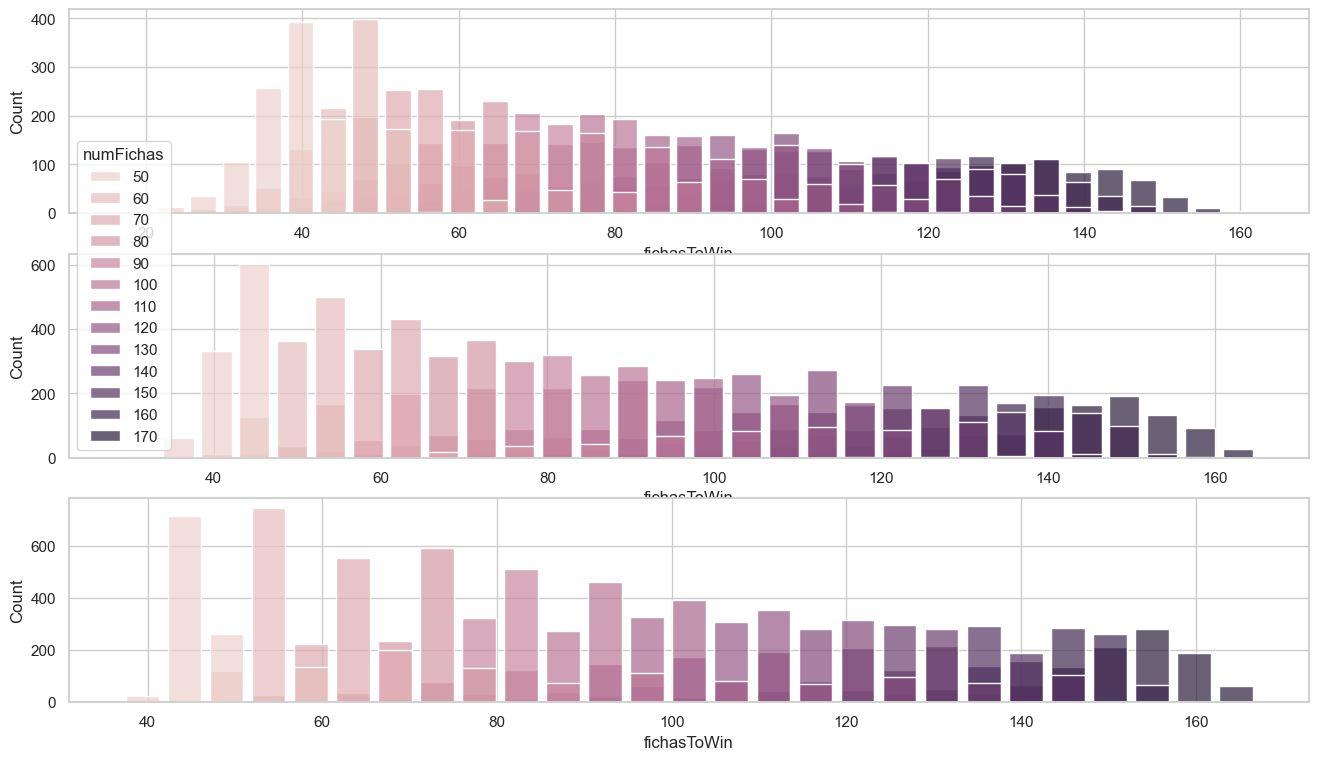

In [50]:
f, axs = plt.subplots(3, 1, figsize=(16, 9))
sns.histplot(data=data1, x="fichasToWin", shrink=.8, alpha=.7, hue="numFichas", ax=axs[0],legend=False)
sns.histplot(data=data2, x="fichasToWin", shrink=.8, alpha=.7, hue="numFichas", ax=axs[1])
sns.histplot(data=data3, x="fichasToWin", shrink=.8, alpha=.7, hue="numFichas", ax=axs[2],legend=False)

In [51]:
data1

,fichasToWin,numFichas
1000,75,100
1001,80,100
1002,89,100
1003,70,100
1004,60,100
...,...,...
13994,66,90
13995,58,90
13996,81,90
13997,78,90


Ahora vamos a cada caso por separado

In [108]:
data01 =  df_loteria1[["fichasToWin","tab2win"]].loc[df_loteria1['numFichas']==50]
data02 =  df_loteria1[["fichasToWin","tab2win"]].loc[df_loteria1['numFichas']==60]
data03 =  df_loteria1[["fichasToWin","tab2win"]].loc[df_loteria1['numFichas']==70]
data04 =  df_loteria1[["fichasToWin","tab2win"]].loc[df_loteria1['numFichas']==80]   
data05 =  df_loteria1[["fichasToWin","tab2win"]].loc[df_loteria1['numFichas']==90]
data06 =  df_loteria1[["fichasToWin","tab2win"]].loc[df_loteria1['numFichas']==100]   
data07 =  df_loteria1[["fichasToWin","tab2win"]].loc[df_loteria1['numFichas']==110]
data08 =  df_loteria1[["fichasToWin","tab2win"]].loc[df_loteria1['numFichas']==120]   
data09 =  df_loteria1[["fichasToWin","tab2win"]].loc[df_loteria1['numFichas']==130]
data10 =  df_loteria1[["fichasToWin","tab2win"]].loc[df_loteria1['numFichas']==140]
data11 =  df_loteria1[["fichasToWin","tab2win"]].loc[df_loteria1['numFichas']==150]   
data12 =  df_loteria1[["fichasToWin","tab2win"]].loc[df_loteria1['numFichas']==160]
data13 =  df_loteria1[["fichasToWin","tab2win"]].loc[df_loteria1['numFichas']==170] 

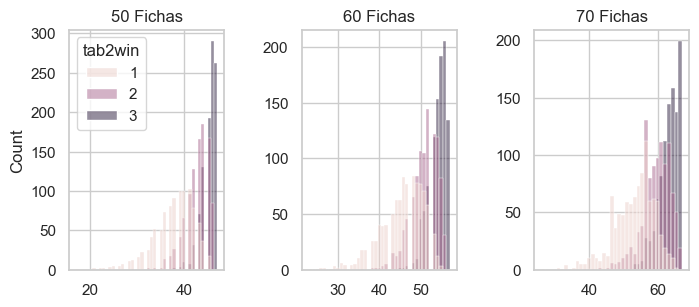

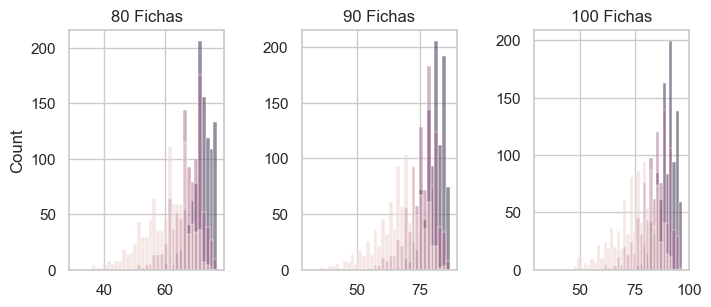

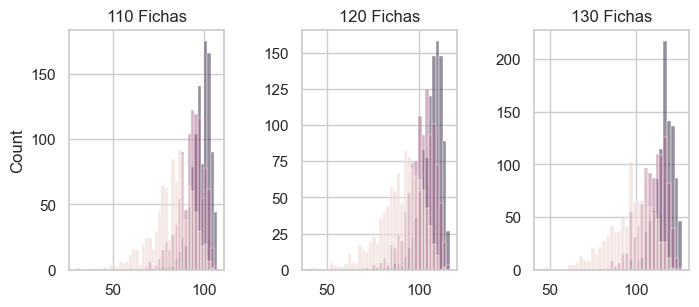

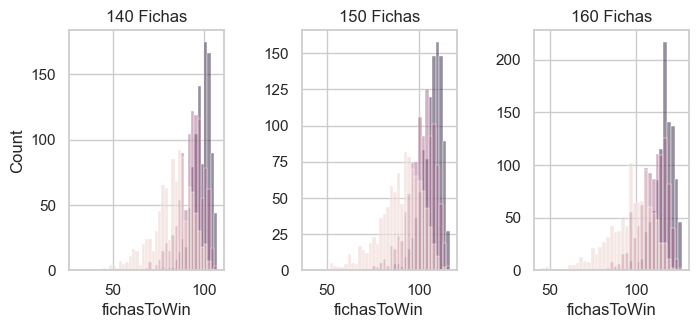

In [107]:
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
#sns.set_theme(style="whitegrid",palette="flare")
#sns.displot(data=df_loteria1, x="fichasToWin", hue="tab2win",row="numFichas")

f, axs1 = plt.subplots(1, 3, figsize=(8, 3))


g1=sns.histplot(data=data01, x="fichasToWin", hue="tab2win",ax=axs1[0])
g2=sns.histplot(data=data02, x="fichasToWin", hue="tab2win",ax=axs1[1],legend=False)
g3=sns.histplot(data=data03, x="fichasToWin", hue="tab2win",ax=axs1[2],legend=False)

g1.set(xlabel=None,title="50 Fichas")
g2.set(xlabel=None,ylabel=None,title="60 Fichas")
g3.set(xlabel=None,ylabel=None,title="70 Fichas")

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.35)

f, axs2 = plt.subplots(1, 3, figsize=(8, 3))

g1=sns.histplot(data=data04, x="fichasToWin", hue="tab2win",ax=axs2[0],legend=False)
g2=sns.histplot(data=data05, x="fichasToWin", hue="tab2win",ax=axs2[1],legend=False)
g3=sns.histplot(data=data06, x="fichasToWin", hue="tab2win",ax=axs2[2],legend=False)


g1.set(xlabel=None,title="80 Fichas")
g2.set(xlabel=None,ylabel=None,title="90 Fichas")
g3.set(xlabel=None,ylabel=None,title="100 Fichas")

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.35)

f, axs3 = plt.subplots(1, 3, figsize=(8, 3))

g1=sns.histplot(data=data07, x="fichasToWin", hue="tab2win",ax=axs3[0],legend=False)
g2=sns.histplot(data=data08, x="fichasToWin", hue="tab2win",ax=axs3[1],legend=False)
g3=sns.histplot(data=data09, x="fichasToWin", hue="tab2win",ax=axs3[2],legend=False)

g1.set(xlabel=None,title="110 Fichas")
g2.set(xlabel=None,ylabel=None,title="120 Fichas")
g3.set(xlabel=None,ylabel=None,title="130 Fichas")

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.35)

f, axs4 = plt.subplots(1, 3, figsize=(8, 3))

g1=sns.histplot(data=data07, x="fichasToWin", hue="tab2win",ax=axs4[0],legend=False)
g2=sns.histplot(data=data08, x="fichasToWin", hue="tab2win",ax=axs4[1],legend=False)
g3=sns.histplot(data=data09, x="fichasToWin", hue="tab2win",ax=axs4[2],legend=False)

g1.set(title="140 Fichas")
g2.set(ylabel=None,title="150 Fichas")
g3.set(ylabel=None,title="160 Fichas")
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.35)

plt.show()

Por ahora se aprecia como el numero de cartones llenos incrementa considerablemente el numero de fichas necesarias para ganar, porque se visualizan las barras grices mas a la derecha en cada gráfico. Todos los graficos tienen una distribucion parecida, pero a medida que aumenta el tamaño total de fichas, el margen de fichas donde aparece ganador la tabla se amplía.

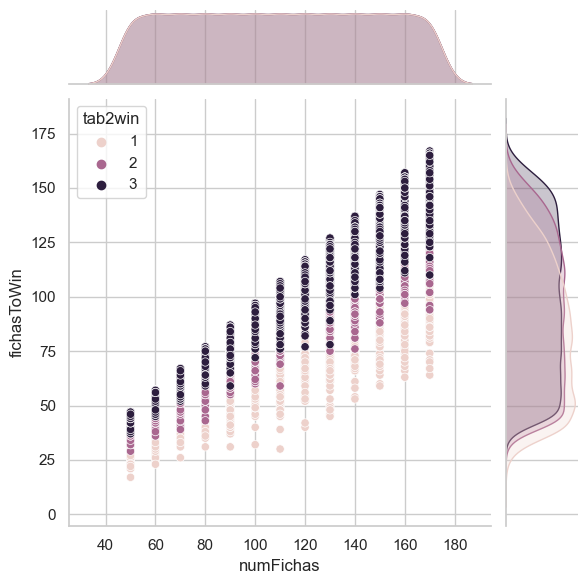

In [125]:
sns.jointplot(data=df_loteria1,y="fichasToWin", hue="tab2win",x="numFichas")

En la siguente gráfica se aprecia la dependencia casi lineal que existe entre el numero de fichas totales y las fichas que necesita un carton para ganar, ademas, tambien se ve mucho mejor como en numeros de cartones necesarios para ganar incrementa las fichas necesarias para ganar con un carton.

In [131]:
fichasFttab = []
for i in range(1,4):
    for j in range(50,180,10):
         a = df_loteria1['fichasToWin'].loc[(df_loteria1['tab2win']==i)&(df_loteria1['numFichas']==j)]
         describe = [i,j,a.mean(),a.std(),a.min(),a.max()]   
         #describe =pd.Series({ 'mean':a.mean(),'std':a.std(),'min':a.min(),'max':a.max()})   
         #fichasFttab = pd.concat([fichasFttab,describe.T],ignore_index=True)
         fichasFttab.append(describe)

describe_df_loteria = pd.DataFrame(fichasFttab,columns=["cards2win","num_fichas","mean_F2W","std_F2W","min_F2W","max_F2W"])

En la entrada anterior estamos calculando un DataFrame que contiene la media de fichas para ganar, maximo de fichas, minimo de fichas para cada caso, anexamos 2 columnas categoricas, los cartones que necesitamos llenar para ganar `cads2win` y en número de fichas totales `num_fichas`.

In [133]:
describe_df_loteria .head(3)

,cards2win,num_fichas,mean_F2W,std_F2W,min_F2W,max_F2W
0,1,50,37.744745,4.378384,17,45
1,1,60,45.569000,5.263358,23,55
2,1,70,53.088000,6.052346,26,65


Graficamos los datos obtenidos.

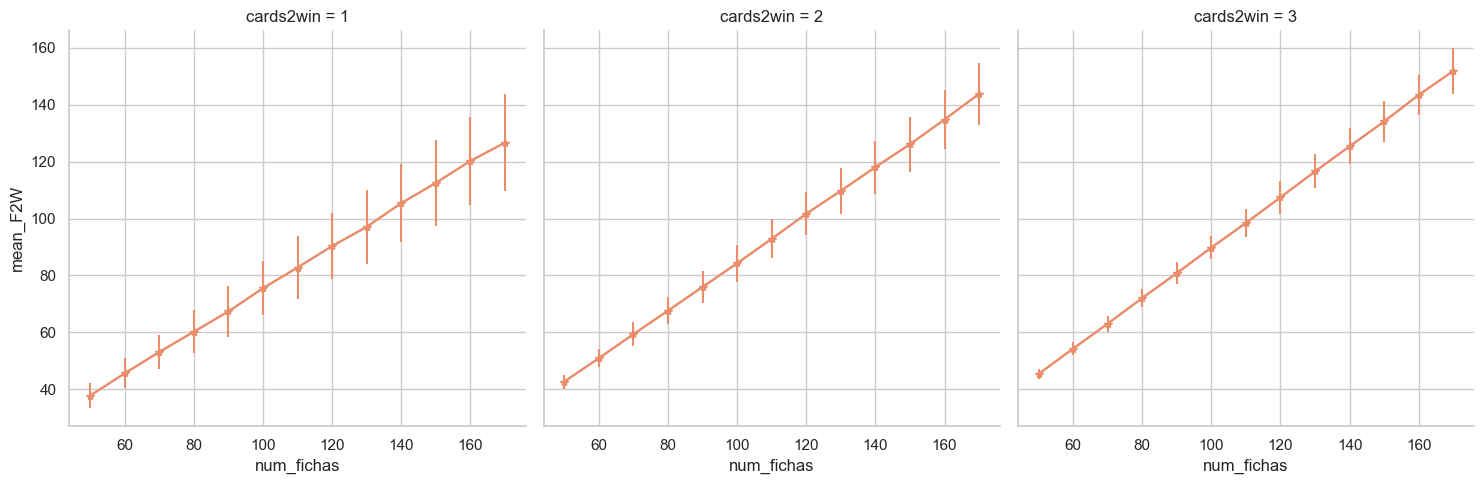

In [152]:
g=sns.relplot(data=describe_df_loteria,x="num_fichas",col="cards2win",y="mean_F2W",kind="line")
g.map(plt.errorbar, "num_fichas", "mean_F2W", "std_F2W", marker="*")

Vemos que si hay una dependencia lienal entre las fichas necesarias para ganar y las fichas totales, pero que la dispersion, representada por las barras verticales, se incremente a medida que aumentamos el número total defichas.

Abajo se puede notar un incremento de la pendiente para las tres formas de ganar.


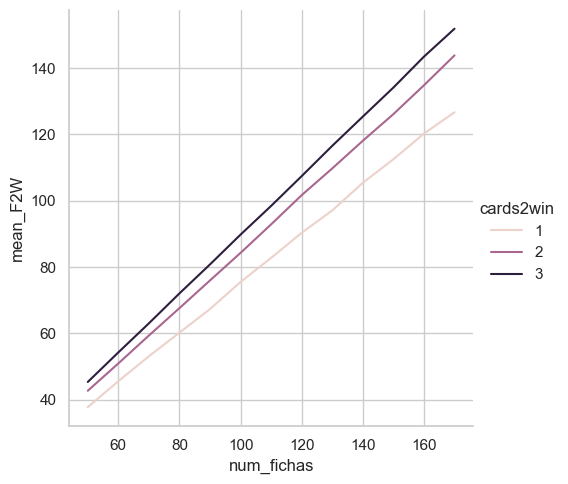

In [149]:
g=sns.relplot(data=describe_df_loteria,x="num_fichas",hue="cards2win",y="mean_F2W",kind="line")

Con esta informacion podemos decir que el numero de fichas sono determinará el tiempo de una ronda de loteria. Por otro lado esto es una muestra para escoger un tamaño de conjunto de fichas y simular otros aspectos como el numero de tablas en las fichas necesarias para ganar, 